<H1>Coursera Capstone</H1>
<p>This notebook will be used for the IBM Applied 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<h2>Begin EDA</h2>

In [3]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
result = df.describe()
print("SUMMARY DESCRIPTIVE STATS FOR NUMERICAL COLUMNS:")
print(result)
print()

SUMMARY DESCRIPTIVE STATS FOR NUMERICAL COLUMNS:
        SEVERITYCODE              X              Y       OBJECTID  \
count  194673.000000  189339.000000  189339.000000  194673.000000   
mean        1.298901    -122.330518      47.619543  108479.364930   
std         0.457778       0.029976       0.056157   62649.722558   
min         1.000000    -122.419091      47.495573       1.000000   
25%         1.000000    -122.348673      47.575956   54267.000000   
50%         1.000000    -122.330224      47.615369  106912.000000   
75%         2.000000    -122.311937      47.663664  162272.000000   
max         2.000000    -122.238949      47.734142  219547.000000   

              INCKEY      COLDETKEY         INTKEY  SEVERITYCODE.1  \
count  194673.000000  194673.000000   65070.000000   194673.000000   
mean   141091.456350  141298.811381   37558.450576        1.298901   
std     86634.402737   86986.542110   51745.990273        0.457778   
min      1001.000000    1001.000000   23807.00000

In [5]:
def freq(var):
    result = df[var].value_counts()
    print("FREQUENCY DISTRIBUTION")
    print(result.head())
    print('')
    
freq('JUNCTIONTYPE')
freq('INCDTTM')
freq('INCDATE')
freq('COLLISIONTYPE')
freq('SEVERITYDESC')
freq('EXCEPTRSNDESC')
freq('EXCEPTRSNCODE')
freq('LOCATION')
freq('ADDRTYPE')
freq('STATUS')
freq('REPORTNO')
freq('SDOT_COLDESC')
freq('INATTENTIONIND')
freq('UNDERINFL')
freq('WEATHER')
freq('ROADCOND')
freq('LIGHTCOND')
freq('PEDROWNOTGRNT')
freq('SPEEDING')
freq('ST_COLCODE')
freq('ST_COLDESC')
freq('HITPARKEDCAR')
freq('SEVERITYCODE')

FREQUENCY DISTRIBUTION
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Name: JUNCTIONTYPE, dtype: int64

FREQUENCY DISTRIBUTION
11/2/2006    96
10/3/2008    91
11/5/2005    83
12/4/2004    74
6/1/2006     73
Name: INCDTTM, dtype: int64

FREQUENCY DISTRIBUTION
2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    92
2005/05/18 00:00:00+00    84
2006/01/13 00:00:00+00    83
2005/11/05 00:00:00+00    83
Name: INCDATE, dtype: int64

FREQUENCY DISTRIBUTION
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Name: COLLISIONTYPE, dtype: int64

FREQUENCY DISTRIBUTION
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

FREQUENCY DISTRIBUTION

In [6]:
result = df.apply(lambda x: sum(x.isnull()), axis=0) 
print("MISSING VALUES (NAN) BY COLUMNS:")
result
#none of the numeric values have missing rows so no need to do a median fill

MISSING VALUES (NAN) BY COLUMNS:


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
df.loc[ df['SEVERITYCODE'] == 2, 'LOCATION'].value_counts().head()

AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              120
6TH AVE AND JAMES ST                                        107
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N     94
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST        94
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST               88
Name: LOCATION, dtype: int64

In [8]:
df = df.drop_duplicates(keep="first")

In [9]:
df.shape
#no rows dropped

(194673, 38)

In [10]:
#fill the columns with less than 10% missing
def missing_fill(var, fill):
    df[var] = df[var].fillna(fill)    
    
missing_fill('LOCATION', 'Unknown')
missing_fill('JUNCTIONTYPE', 'Unknown')
missing_fill('UNDERINFL', 'Unknown')
missing_fill('WEATHER', 'Unknown')
missing_fill('ROADCOND', 'Unknown')
missing_fill('LIGHTCOND', 'Unknown')
missing_fill('ST_COLCODE', '99')
missing_fill('ST_COLDESC', 'Unknown')
missing_fill('ADDRTYPE', 'Unknown')
missing_fill('COLLISIONTYPE', 'Unknown')

In [11]:
#drop out the columns with more than 10% missing
df2 = df.filter(items=['SEVERITYCODE','OBJECTID', 'INCKEY', 'COLDETKEY',
                               'REPORTNO', 'STATUS',
                               'SEVERITYDESC','PERSONCOUNT',
                               'VEHCOUNT', 'INCDATE',
                               'INCDTTM', 'SDOT_COLCODE',
                               'SDOT_COLDESC', 'SEGLANKEY',
                               'CROSSWALKKEY', 'HITPARKEDCAR', 'LOCATION',
                               'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER',
                               'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC',
                               'ADDRTYPE', 'COLLISIONTYPE'
                               ])

In [12]:
df2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 25 columns):
SEVERITYCODE     194673 non-null int64
OBJECTID         194673 non-null int64
INCKEY           194673 non-null int64
COLDETKEY        194673 non-null int64
REPORTNO         194673 non-null object
STATUS           194673 non-null object
SEVERITYDESC     194673 non-null object
PERSONCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
INCDATE          194673 non-null object
INCDTTM          194673 non-null object
SDOT_COLCODE     194673 non-null int64
SDOT_COLDESC     194673 non-null object
CROSSWALKKEY     194673 non-null int64
HITPARKEDCAR     194673 non-null object
LOCATION         194673 non-null object
JUNCTIONTYPE     194673 non-null object
UNDERINFL        194673 non-null object
WEATHER          194673 non-null object
ROADCOND         194673 non-null object
LIGHTCOND        194673 non-null object
ST_COLCODE       194673 non-null object
ST_COLDESC       

In [13]:
df2['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [14]:
df2['DAYOFWEEKDESC'] = df2['INCDTTM'].dt.weekday_name
df2['DAYOFWEEK'] = df2['INCDTTM'].dt.dayofweek
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,ADDRTYPE,COLLISIONTYPE,DAYOFWEEKDESC,DAYOFWEEK
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,N,Overcast,Wet,Daylight,10,Entering at angle,Intersection,Angles,Wednesday,2
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,Block,Sideswipe,Wednesday,2
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,Overcast,Dry,Daylight,32,One parked--one moving,Block,Parked Car,Thursday,3
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,N,Clear,Dry,Daylight,23,From same direction - all others,Block,Other,Friday,4
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,Raining,Wet,Daylight,10,Entering at angle,Intersection,Angles,Wednesday,2


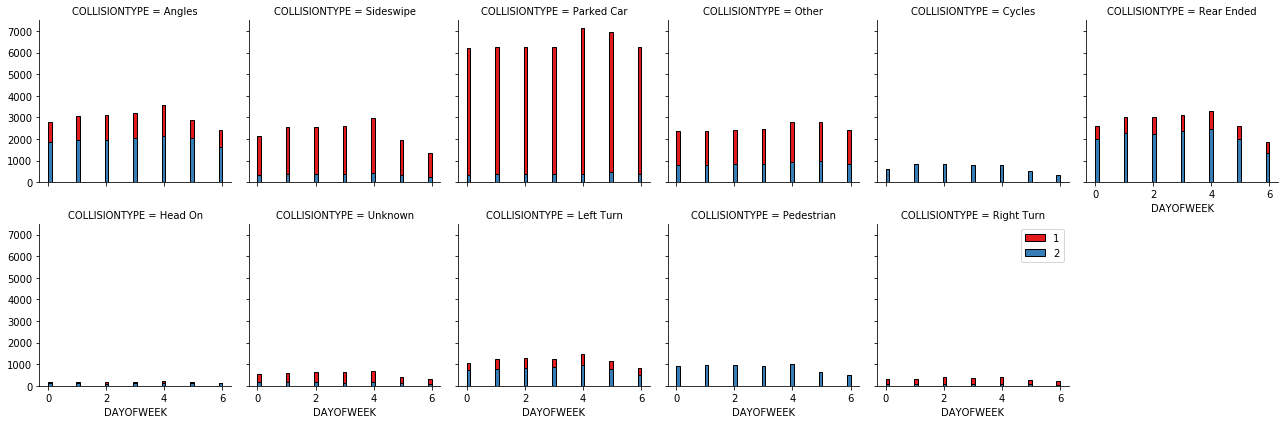

In [15]:
bins = np.linspace(df2.DAYOFWEEK.min(), df2.DAYOFWEEK.max())
g = sns.FacetGrid(df2, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=6)
g.map(plt.hist, 'DAYOFWEEK', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [16]:
df2.groupby(['DAYOFWEEKDESC'])['SEVERITYDESC'].value_counts(normalize=True)



DAYOFWEEKDESC  SEVERITYDESC                  
Friday         Property Damage Only Collision    0.704358
               Injury Collision                  0.295642
Monday         Property Damage Only Collision    0.697281
               Injury Collision                  0.302719
Saturday       Property Damage Only Collision    0.706196
               Injury Collision                  0.293804
Sunday         Property Damage Only Collision    0.722022
               Injury Collision                  0.277978
Thursday       Property Damage Only Collision    0.692470
               Injury Collision                  0.307530
Tuesday        Property Damage Only Collision    0.694250
               Injury Collision                  0.305750
Wednesday      Property Damage Only Collision    0.695705
               Injury Collision                  0.304295
Name: SEVERITYDESC, dtype: float64

In [17]:
df2.groupby(['JUNCTIONTYPE'])['SEVERITYDESC'].value_counts(normalize=True)



JUNCTIONTYPE                                       SEVERITYDESC                  
At Intersection (but not related to intersection)  Property Damage Only Collision    0.703051
                                                   Injury Collision                  0.296949
At Intersection (intersection related)             Property Damage Only Collision    0.567362
                                                   Injury Collision                  0.432638
Driveway Junction                                  Property Damage Only Collision    0.696936
                                                   Injury Collision                  0.303064
Mid-Block (but intersection related)               Property Damage Only Collision    0.679816
                                                   Injury Collision                  0.320184
Mid-Block (not related to intersection)            Property Damage Only Collision    0.783920
                                                   Injury Collision     

In [18]:
df2.groupby(['COLLISIONTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYDESC                  
Angles         Property Damage Only Collision    0.607083
               Injury Collision                  0.392917
Cycles         Injury Collision                  0.876085
               Property Damage Only Collision    0.123915
Head On        Property Damage Only Collision    0.569170
               Injury Collision                  0.430830
Left Turn      Property Damage Only Collision    0.605123
               Injury Collision                  0.394877
Other          Property Damage Only Collision    0.742142
               Injury Collision                  0.257858
Parked Car     Property Damage Only Collision    0.944527
               Injury Collision                  0.055473
Pedestrian     Injury Collision                  0.898305
               Property Damage Only Collision    0.101695
Rear Ended     Property Damage Only Collision    0.569639
               Injury Collision                  0.430361
Right Turn     Property Da

In [19]:
df2.groupby(['UNDERINFL'])['SEVERITYDESC'].value_counts(normalize=True)

UNDERINFL  SEVERITYDESC                  
0          Property Damage Only Collision    0.717628
           Injury Collision                  0.282372
1          Property Damage Only Collision    0.593742
           Injury Collision                  0.406258
N          Property Damage Only Collision    0.691884
           Injury Collision                  0.308116
Unknown    Property Damage Only Collision    0.789312
           Injury Collision                  0.210688
Y          Property Damage Only Collision    0.621732
           Injury Collision                  0.378268
Name: SEVERITYDESC, dtype: float64

In [20]:
df2['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

In [21]:
df2['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1],inplace=True)

In [22]:
df2.groupby(['UNDERINFL'])['SEVERITYDESC'].value_counts(normalize=True)

UNDERINFL  SEVERITYDESC                  
0          Property Damage Only Collision    0.703340
           Injury Collision                  0.296660
1          Property Damage Only Collision    0.609473
           Injury Collision                  0.390527
Unknown    Property Damage Only Collision    0.789312
           Injury Collision                  0.210688
Name: SEVERITYDESC, dtype: float64

In [23]:
df2.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)

WEATHER                   SEVERITYDESC                  
Blowing Sand/Dirt         Property Damage Only Collision    0.732143
                          Injury Collision                  0.267857
Clear                     Property Damage Only Collision    0.677509
                          Injury Collision                  0.322491
Fog/Smog/Smoke            Property Damage Only Collision    0.671353
                          Injury Collision                  0.328647
Other                     Property Damage Only Collision    0.860577
                          Injury Collision                  0.139423
Overcast                  Property Damage Only Collision    0.684456
                          Injury Collision                  0.315544
Partly Cloudy             Injury Collision                  0.600000
                          Property Damage Only Collision    0.400000
Raining                   Property Damage Only Collision    0.662815
                          Injury Collision    

In [24]:
df2.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)

ROADCOND        SEVERITYDESC                  
Dry             Property Damage Only Collision    0.678227
                Injury Collision                  0.321773
Ice             Property Damage Only Collision    0.774194
                Injury Collision                  0.225806
Oil             Property Damage Only Collision    0.625000
                Injury Collision                  0.375000
Other           Property Damage Only Collision    0.674242
                Injury Collision                  0.325758
Sand/Mud/Dirt   Property Damage Only Collision    0.693333
                Injury Collision                  0.306667
Snow/Slush      Property Damage Only Collision    0.833665
                Injury Collision                  0.166335
Standing Water  Property Damage Only Collision    0.739130
                Injury Collision                  0.260870
Unknown         Property Damage Only Collision    0.909955
                Injury Collision                  0.090045
Wet      

In [25]:
df2.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    0.782694
                          Injury Collision                  0.217306
Dark - Street Lights Off  Property Damage Only Collision    0.736447
                          Injury Collision                  0.263553
Dark - Street Lights On   Property Damage Only Collision    0.701589
                          Injury Collision                  0.298411
Dark - Unknown Lighting   Property Damage Only Collision    0.636364
                          Injury Collision                  0.363636
Dawn                      Property Damage Only Collision    0.670663
                          Injury Collision                  0.329337
Daylight                  Property Damage Only Collision    0.668116
                          Injury Collision                  0.331884
Dusk                      Property Damage Only Collision    0.670620
                          Injury Collision    

In [26]:
df2.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision    0.890812
              Injury Collision                  0.109188
Block         Property Damage Only Collision    0.762885
              Injury Collision                  0.237115
Intersection  Property Damage Only Collision    0.572476
              Injury Collision                  0.427524
Unknown       Property Damage Only Collision    0.900831
              Injury Collision                  0.099169
Name: SEVERITYDESC, dtype: float64

In [27]:
df2.groupby(['STATUS'])['SEVERITYDESC'].value_counts(normalize=True)

STATUS     SEVERITYDESC                  
Matched    Property Damage Only Collision    0.698824
           Injury Collision                  0.301176
Unmatched  Property Damage Only Collision    0.789441
           Injury Collision                  0.210559
Name: SEVERITYDESC, dtype: float64

In [28]:
df2 = pd.concat([df2,pd.get_dummies(df2['ADDRTYPE'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,LIGHTCOND,ST_COLCODE,ST_COLDESC,ADDRTYPE,COLLISIONTYPE,DAYOFWEEKDESC,DAYOFWEEK,Alley,Block,Intersection
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,Daylight,10,Entering at angle,Intersection,Angles,Wednesday,2,0,0,1
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,Dark - Street Lights On,11,From same direction - both going straight - bo...,Block,Sideswipe,Wednesday,2,0,1,0
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,Daylight,32,One parked--one moving,Block,Parked Car,Thursday,3,0,1,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,Daylight,23,From same direction - all others,Block,Other,Friday,4,0,1,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,Daylight,10,Entering at angle,Intersection,Angles,Wednesday,2,0,0,1


In [29]:
df2 = pd.concat([df2,pd.get_dummies(df2['COLLISIONTYPE'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,1,0,0,0,0,0,0,0,0,0
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,0,0,0,0,0,0,0,0,1
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,0,0,0,0,1,0,0,0,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,0,0,0,1,0,0,0,0,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df2 = pd.concat([df2,pd.get_dummies(df2['WEATHER'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,0,0,0,0,1,0,0,0,0,0
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,0,0,0,1,0,0,0,0,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,1,0,0,0,0,0,0,0,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df2 = pd.concat([df2,pd.get_dummies(df2['ROADCOND'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,0,0,0,0,0,0,0,0,0,1
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,0,0,0,0,0,0,0,0,1
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,0,1,0,0,0,0,0,0,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,0,1,0,0,0,0,0,0,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df2 = pd.concat([df2,pd.get_dummies(df2['LIGHTCOND'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,0,1,0,0,0,0,0,1,0,0
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,1,0,0,1,0,0,0,0,0
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,0,0,0,0,0,0,1,0,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,0,0,0,0,0,0,1,0,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,1,0,0,0,0,0,1,0,0


In [33]:
df2 = pd.concat([df2,pd.get_dummies(df2['JUNCTIONTYPE'])], axis=1)
df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Dawn,Daylight,Dusk,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,0,1,0,0,0,1,0,0,0,0
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,0,0,0,0,0,0,0,1,0
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,1,0,0,0,0,0,0,1,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,1,0,0,0,0,0,0,1,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,1,0,0,0,1,0,0,0,0


In [34]:
df2 = pd.concat([df2,pd.get_dummies(df2['STATUS'])], axis=1)
#df2.drop(['Unknown'], axis = 1,inplace=True)
df2.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,...,Dusk,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Matched,Unmatched
0,2,1,1307,1307,3502005,Matched,Injury Collision,2,2,2013/03/27 00:00:00+00,...,0,0,0,1,0,0,0,0,1,0
1,1,2,52200,52200,2607959,Matched,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,...,0,0,0,0,0,0,1,0,1,0
2,1,3,26700,26700,1482393,Matched,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,...,0,0,0,0,0,0,1,0,1,0
3,1,4,1144,1144,3503937,Matched,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,...,0,0,0,0,0,0,1,0,1,0
4,2,5,17700,17700,1807429,Matched,Injury Collision,2,2,2004/01/28 00:00:00+00,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 74 columns):
SEVERITYCODE                                         194673 non-null int64
OBJECTID                                             194673 non-null int64
INCKEY                                               194673 non-null int64
COLDETKEY                                            194673 non-null int64
REPORTNO                                             194673 non-null object
STATUS                                               194673 non-null object
SEVERITYDESC                                         194673 non-null object
PERSONCOUNT                                          194673 non-null int64
VEHCOUNT                                             194673 non-null int64
INCDATE                                              194673 non-null object
INCDTTM                                              194673 non-null datetime64[ns]
SDOT_COLCODE                                       